# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : January 23 2017


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [2]:
import pandas as pd

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [4]:
rootpath_rawimage="./trim_images"
object_name='HD60753' # Please put the good object name

In [5]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio2017Jan18_R400_289_427'  # Please put the good date

In [6]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [7]:
filelist_all=os.listdir(rootpath_rawimage) 

In [8]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['trim_20170118_289.fits',
 'trim_20170118_290.fits',
 'trim_20170118_291.fits',
 'trim_20170118_292.fits',
 'trim_20170118_293.fits',
 'trim_20170118_294.fits',
 'trim_20170118_295.fits',
 'trim_20170118_296.fits',
 'trim_20170118_297.fits',
 'trim_20170118_298.fits',
 'trim_20170118_299.fits',
 'trim_20170118_300.fits',
 'trim_20170118_301.fits',
 'trim_20170118_302.fits',
 'trim_20170118_303.fits',
 'trim_20170118_304.fits',
 'trim_20170118_305.fits',
 'trim_20170118_306.fits',
 'trim_20170118_307.fits',
 'trim_20170118_308.fits',
 'trim_20170118_309.fits',
 'trim_20170118_310.fits',
 'trim_20170118_311.fits',
 'trim_20170118_312.fits',
 'trim_20170118_313.fits',
 'trim_20170118_314.fits',
 'trim_20170118_315.fits',
 'trim_20170118_316.fits',
 'trim_20170118_317.fits',
 'trim_20170118_318.fits',
 'trim_20170118_319.fits',
 'trim_20170118_320.fits',
 'trim_20170118_321.fits',
 'trim_20170118_322.fits',
 'trim_20170118_323.fits',
 'trim_20170118_324.fits',
 'trim_20170118_325.fits',
 

In [9]:
re.findall('^trim_20170117_([^ ]*).fits$','trim_20170117_195.fits')

['195']

In [10]:
re.findall('^trim_20170117_([0-9]+).fits$','trim_20170117_195.fits')

['195']

In [11]:
#index=0
#indexes_files= []
#filelist_fitsimages= []
#for dir in dirlist_all: # loop on directories, one per image       
#        dir_leaf= rootpath_rawimage+'/'+dir # build the name of leaf directory
#        listfiles=os.listdir(dir_leaf) 
#        for filename in listfiles:
#            if re.search('^trim.*fits$',filename):  #example of filename filter
#                index=index+1
#                shortfilename=dir_leaf+'/'+filename
#                filelist_fitsimages.append(shortfilename)
#                indexes_files.append(index)

In [12]:
index=0
indexes_files= []
filelist_fitsimages= []
for filename in filelist_all:
    if re.search('^trim.*fits$',filename):  #example of filename filter
        str_index=re.findall('^trim_20170118_([0-9]+).fits$',filename)
        index=int(str_index[0])
        indexes_files.append(index)
        fullpath=os.path.join(rootpath_rawimage,filename)
        filelist_fitsimages.append(fullpath)

### Build tables for output file

In [13]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []

for idx,file in np.ndenumerate(filelist_fitsimages):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)

    hdu_list.close()
    

## Build outputfile

In [14]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)


In [15]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=col_filename)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 


In [16]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12])

In [17]:
tbhdu.writeto(logfile,clobber=True)

## Convert into Table
---------------------------

In [18]:
thetable= Table(tbhdu.data)

In [19]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
0,289,1.084,2017-01-19T05:14:07.108,trim_20170118_289.fits,30.0,22.715,15.8,780.0,57.0,7.6,0.552
1,290,1.085,2017-01-19T05:15:20.619,trim_20170118_290.fits,30.0,22.815,15.8,779.0,57.0,5.0,0.521
2,291,1.086,2017-01-19T05:16:34.137,trim_20170118_291.fits,30.0,22.917,15.7,779.0,57.0,5.4,0.583
3,292,1.086,2017-01-19T05:17:47.656,trim_20170118_292.fits,30.0,23.021,15.7,779.0,57.0,4.6,0.568
4,293,1.087,2017-01-19T05:19:01.170,trim_20170118_293.fits,30.0,23.126,15.6,779.0,57.0,5.6,0.673
5,294,1.088,2017-01-19T05:20:14.692,trim_20170118_294.fits,30.0,23.233,15.7,779.0,57.0,5.8,0.609
6,295,1.089,2017-01-19T05:21:28.219,trim_20170118_295.fits,30.0,23.341,15.7,779.0,57.0,4.9,0.579
7,296,1.09,2017-01-19T05:22:41.737,trim_20170118_296.fits,30.0,23.452,15.8,779.0,57.0,3.7,0.639
8,297,1.091,2017-01-19T05:23:55.261,trim_20170118_297.fits,30.0,23.564,15.9,779.0,57.0,4.7,0.635
9,298,1.092,2017-01-19T05:25:08.778,trim_20170118_298.fits,30.0,23.678,15.9,779.0,57.0,4.4,0.563


## Read the logfile into a Table
---------------------------------------

In [20]:
t = Table.read(logfile)

In [21]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32
289,1.084,2017-01-19T05:14:07.108,trim_20170118_289.fits,30.0,22.715,15.8,780.0,57.0,7.6,0.552
290,1.085,2017-01-19T05:15:20.619,trim_20170118_290.fits,30.0,22.815,15.8,779.0,57.0,5.0,0.521
291,1.086,2017-01-19T05:16:34.137,trim_20170118_291.fits,30.0,22.917,15.7,779.0,57.0,5.4,0.583
292,1.086,2017-01-19T05:17:47.656,trim_20170118_292.fits,30.0,23.021,15.7,779.0,57.0,4.6,0.568
293,1.087,2017-01-19T05:19:01.170,trim_20170118_293.fits,30.0,23.126,15.6,779.0,57.0,5.6,0.673
294,1.088,2017-01-19T05:20:14.692,trim_20170118_294.fits,30.0,23.233,15.7,779.0,57.0,5.8,0.609
295,1.089,2017-01-19T05:21:28.219,trim_20170118_295.fits,30.0,23.341,15.7,779.0,57.0,4.9,0.579
296,1.09,2017-01-19T05:22:41.737,trim_20170118_296.fits,30.0,23.452,15.8,779.0,57.0,3.7,0.639
297,1.091,2017-01-19T05:23:55.261,trim_20170118_297.fits,30.0,23.564,15.9,779.0,57.0,4.7,0.635


## Convert into pandas to plot
---------------------------------------

In [22]:
df = t.to_pandas()

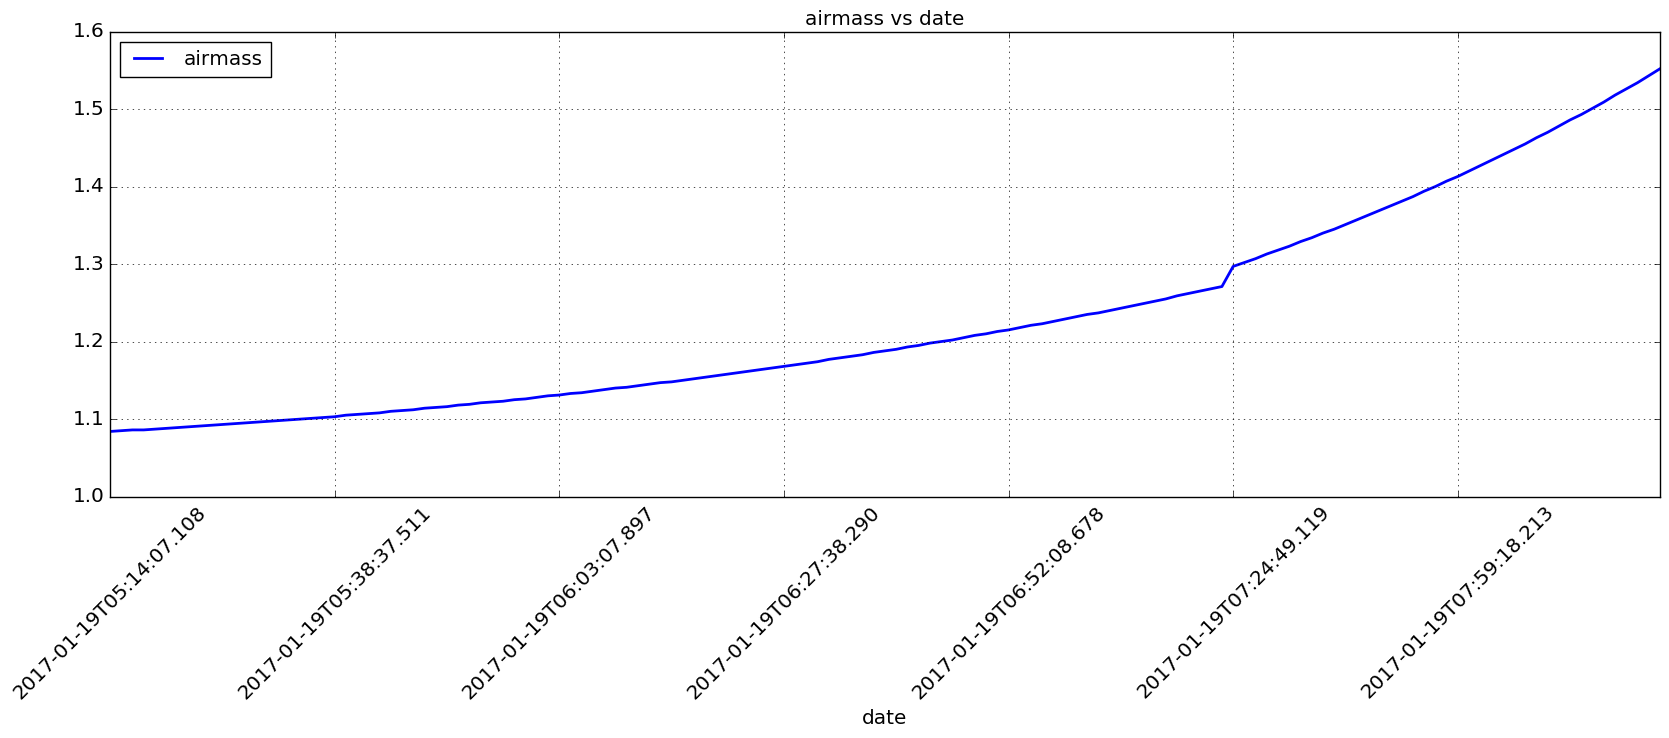

In [23]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',linewidth=2)


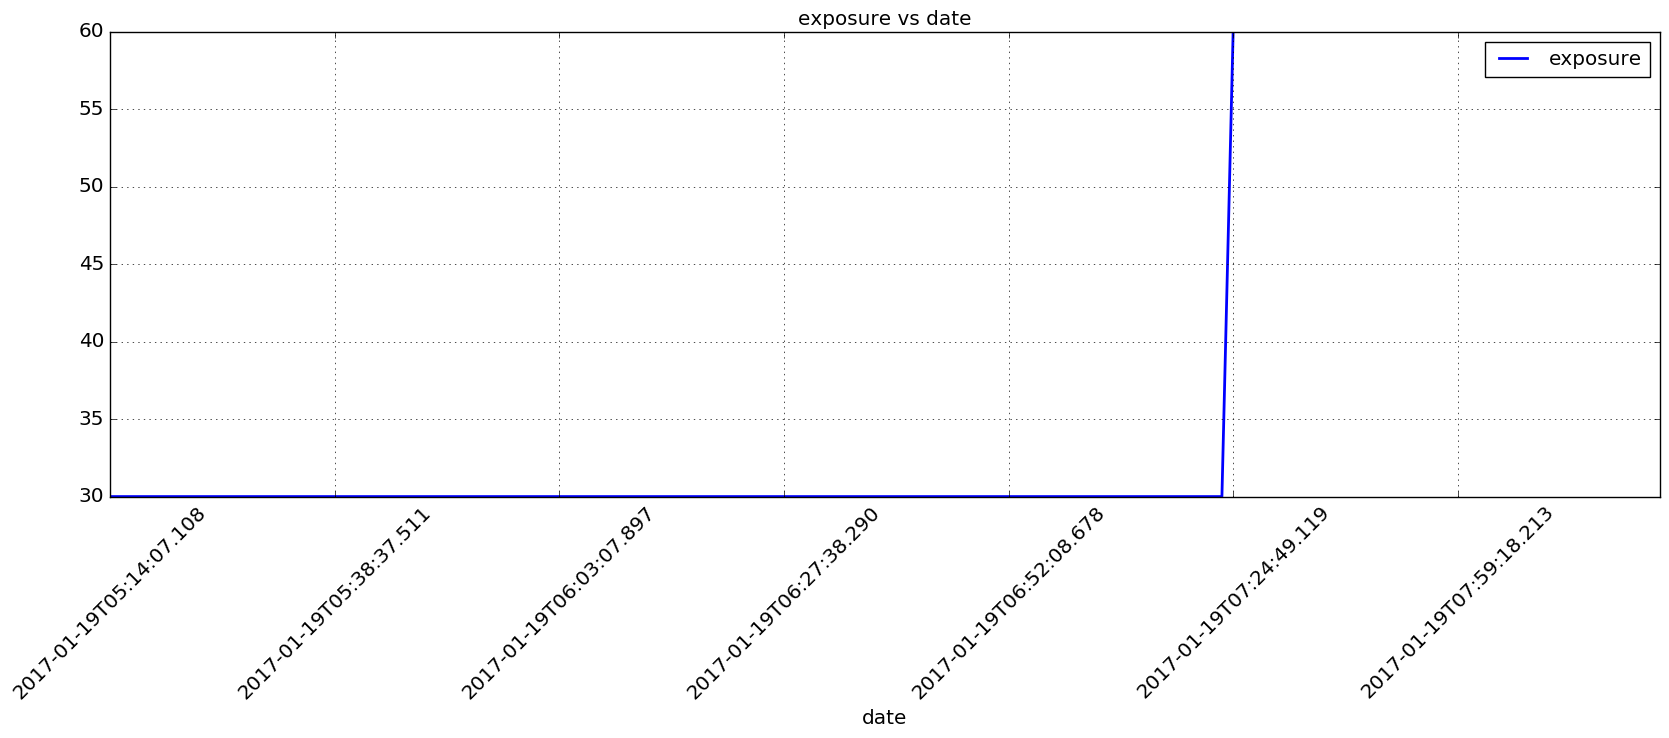

In [24]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',linewidth=2)

### Save pandas file


In [25]:
df.to_csv(pandaslogfile)